In [40]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


In [41]:
bioclim = pd.read_csv('data/csv/bioclim.csv')
bioclim = bioclim.drop(columns=['Unnamed: 0'])

In [42]:
crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
bioclim = pd.merge(bioclim, crta_coords_filtered, on=['lat', 'lon'])
bioclim = bioclim.drop_duplicates(subset=['lat', 'lon'])
bioclim = bioclim[bioclim['bio_13']!=-3.4e+38]
coords = bioclim[['lat', 'lon']]
bioclim = bioclim.drop(columns=['lat', 'lon'])
bioclim['group'] = 'osmia'
bioclim

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi,group
0,82.0,1.100000,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,9.683333,230.0,18.533333,710.95750,132.0,26.900000,36.0,230.0,0.157664,osmia
10,81.0,1.400000,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,10.008333,227.0,18.816666,709.33014,125.0,27.000000,35.0,227.0,0.151344,osmia
45,71.0,1.800000,4.933333,31.550068,79,23.0,-1.3,129.0,17.350000,7.666666,...,9.391666,189.0,17.350000,634.90454,136.0,24.300000,35.0,189.0,0.178543,osmia
46,79.0,1.416667,2.500000,30.381304,106,25.1,-2.0,113.0,18.900000,8.233334,...,10.066667,220.0,18.900000,711.54870,121.0,27.100000,33.0,220.0,0.213319,osmia
54,74.0,2.416667,5.600000,33.741497,114,23.5,-1.0,147.0,17.450000,8.266666,...,9.758333,204.0,16.016666,611.29083,157.0,24.500000,43.0,200.0,0.289286,osmia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24203,64.0,2.066667,3.233333,33.107235,200,24.7,-1.1,109.0,18.383333,8.541667,...,10.029167,182.0,16.816668,663.19977,117.0,25.800001,35.0,165.0,0.241975,osmia
24204,67.0,2.250000,3.466667,33.460560,97,25.2,-1.0,117.0,18.733334,8.766666,...,10.333333,196.0,17.200000,669.74330,129.0,26.200000,38.0,175.0,0.259833,osmia
24205,76.0,2.566667,3.800000,32.403847,92,25.3,-0.7,116.0,19.133333,8.425000,...,10.687500,215.0,17.500000,674.28120,123.0,26.000000,37.0,192.0,0.220172,osmia
24206,64.0,1.983333,3.066667,30.981182,157,23.7,-1.1,125.0,17.916666,7.683333,...,9.800000,184.0,16.333334,648.14070,143.0,24.800001,41.0,165.0,0.302638,osmia


In [43]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns=['Unnamed: 0'])
america = america[america['bio_13']!= -3.4e+38]
america_points = america[['lat', 'lon']]
america = america.drop(columns=['lat', 'lon'])
america['group'] = 'america'
column_order = bioclim.columns.tolist()
america = america[column_order]


In [44]:
combined = pd.concat([bioclim, america], ignore_index=True)
combined_points = pd.concat([coords, america_points])

In [45]:
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
combined_scaled

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_12,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi
0,-0.271195,0.217134,-0.192464,-0.616965,-0.464262,-0.305883,0.430635,-0.104645,-0.065032,-0.872280,...,-0.310386,0.098217,-0.231822,0.687064,-0.308889,-0.314647,-0.582890,-0.137355,0.138798,-1.016327
1,-0.296035,0.256443,-0.155440,-0.559670,-0.607882,-0.240577,0.453573,-0.177338,0.006335,-0.828989,...,-0.367786,0.162558,-0.258453,0.728424,-0.315418,-0.376992,-0.571594,-0.184326,0.103351,-1.089214
2,-0.544445,0.308855,0.091951,-0.373954,-0.674437,-0.654182,0.545322,-0.046491,-0.363097,-0.996742,...,-0.460264,0.040475,-0.595781,0.514324,-0.614020,-0.279021,-0.876593,-0.184326,-0.345644,-0.775515
3,-0.345717,0.258627,-0.153757,-0.548800,-0.627148,-0.197039,0.465042,-0.279108,0.027326,-0.812755,...,-0.415619,0.174107,-0.320593,0.740589,-0.306517,-0.412617,-0.560298,-0.278266,0.020641,-0.374432
4,-0.469922,0.389657,0.159268,-0.046119,-0.613136,-0.545339,0.579729,0.215203,-0.337909,-0.801932,...,-0.205152,0.113065,-0.462625,0.319688,-0.708760,-0.091988,-0.854001,0.191436,-0.215672,0.501732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,0.275306,-2.737593,-2.417293,-1.825327,0.071687,-1.829693,-2.654443,0.069818,-2.050734,-0.166096,...,0.139248,-2.731962,0.309678,-0.592671,2.037502,-0.207770,1.665066,0.003555,0.599609,-0.609969
12890,0.300147,-2.656792,-2.509854,-1.964724,0.003379,-2.047380,-2.574162,0.244280,-2.172479,-0.423136,...,0.155193,-2.711340,0.247538,-0.534279,1.875134,-0.163239,1.473030,0.191436,0.776844,-3.836293
12891,0.424351,-2.672078,-2.375220,-1.739897,0.062929,-1.764387,-2.585631,0.404204,-2.025545,-0.101160,...,0.330582,-2.692368,0.416202,-0.578073,1.970329,-0.047456,1.631177,0.379317,0.776844,-1.040636
12892,0.349829,-2.556335,-2.432439,-1.865284,0.003379,-2.330373,-2.470944,0.593205,-2.332006,-0.479956,...,0.375227,-2.702266,0.300801,-0.626732,1.625411,0.050514,1.224512,0.614169,0.847738,-3.786470


In [46]:
from sklearn.decomposition import PCA

X = combined_scaled
y = combined['group']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
combined['PC1'] = X_pca[:,0]
combined['PC2'] = X_pca[:,1]
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.32666837 0.28043887]


In [47]:
america_pts = X_pca[y == 'america']
osmia_points = X_pca[y == 'osmia']


In [48]:

# threshold_distance = 0.05
# close_points_indices = []

# for i, america_point in enumerate(america_points):
#     for osmia_point in osmia_points:
#         distance = np.linalg.norm(america_point - osmia_point)
#         if distance <= threshold_distance:
#             close_points_indices.append(i)
#             break  

# close_america_points = america_points[close_points_indices]

In [49]:
shortest_distances_only = []

for america_point in america_pts:
    # Calculate distances from this America point to all Osmia points
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_points]
    
    # Find the shortest distance for this America point
    shortest_distance = min(distances)
    
    # Add the shortest distance to the list
    shortest_distances_only.append(shortest_distance)

In [50]:

min_val = np.min(shortest_distances_only)
max_val = np.max(shortest_distances_only)

shortest_distances_norm = (shortest_distances_only - min_val) / (max_val - min_val)
shortest_distances_norm

array([0.3117521 , 0.28735403, 0.21977863, ..., 0.43590009, 0.44557818,
       0.3744573 ])

In [51]:
america_only = combined[combined['group'] == 'america']
america_only['dist'] = shortest_distances_norm


/tmp/ipykernel_46388/4218395693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america_only['dist'] = shortest_distances_norm


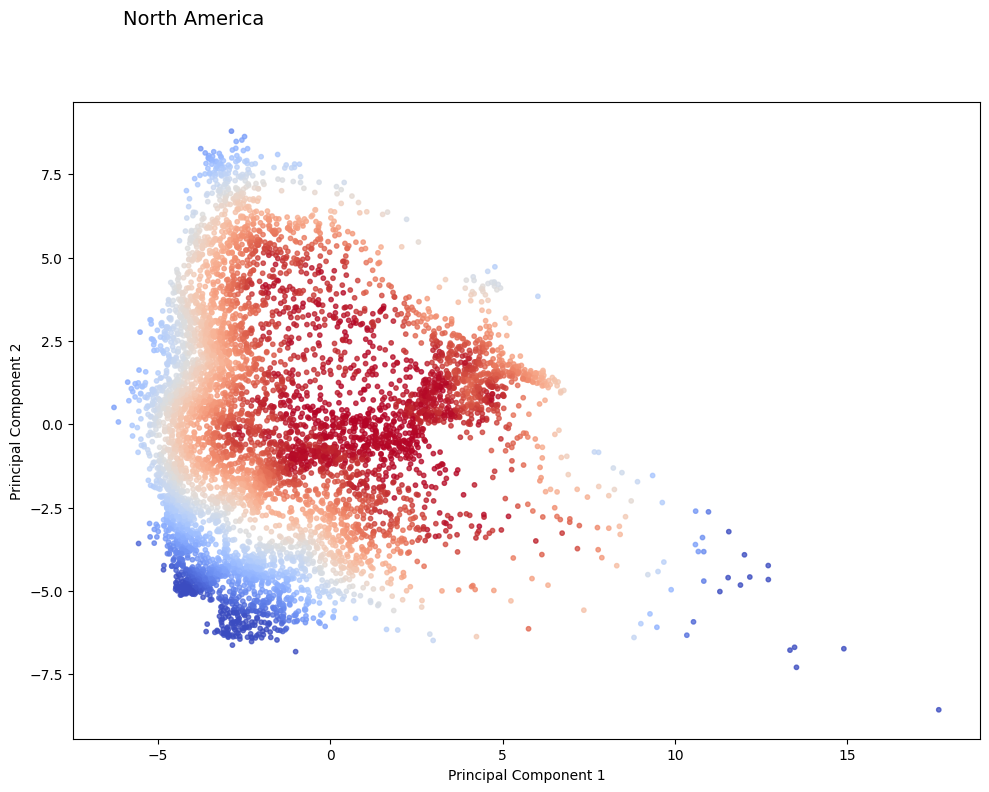

In [52]:
plt.figure(figsize=(10, 8))


plt.scatter(america_only['PC1'], america_only['PC2'], c=america_only['dist'], cmap='coolwarm_r', vmin=0, vmax=.4, label='North America', s=10, marker= 'o', alpha=0.76)


# plt.scatter(X_pca[y == 'osmia', 0], X_pca[y == 'osmia', 1], label='osmia', color='green')
# plt.scatter(X_pca[y == 'america', 0], X_pca[y == 'america', 1], label='America', color='blue')

# Highlight overlapping points
#plt.scatter(close_america_points_norm[:, 0], close_america_points_norm[:, 1], c='#D31F26', s=10, marker= 'o')

# Labeling the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Dataset with Overlapping Points Highlighted')
plt.text(-6, 12, 'North America', fontsize=14, color='k')

plt.tight_layout()
# plt.savefig('figures/pca_colormapped.png', format='png', dpi=300)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


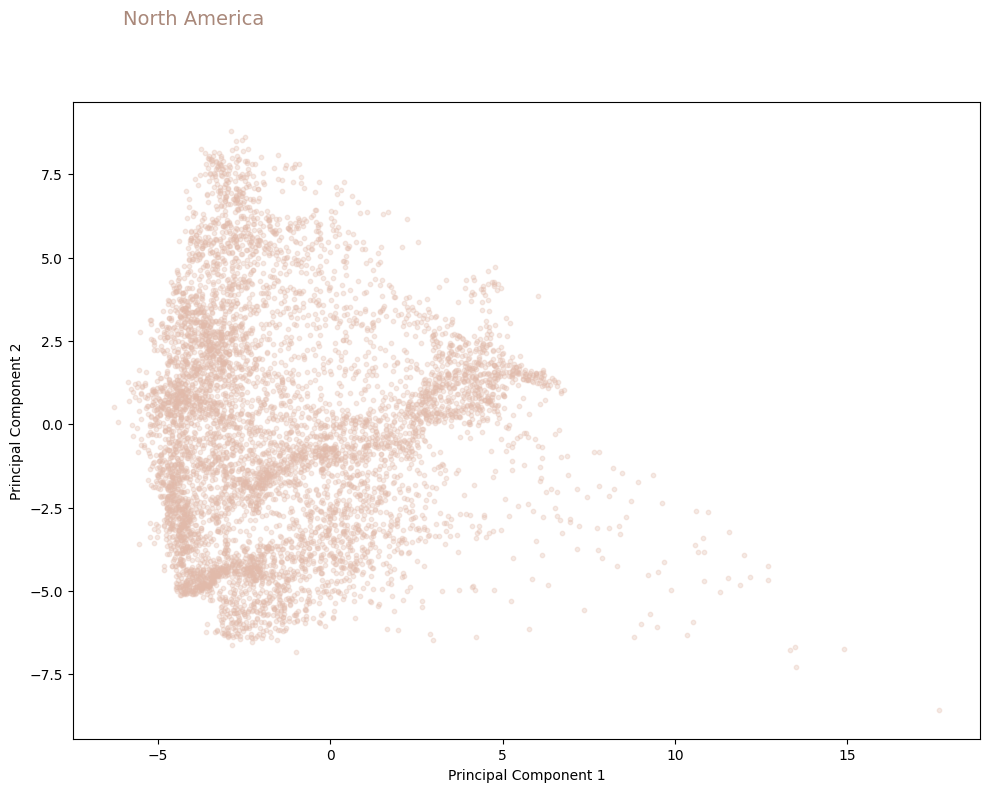

In [53]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = sorted(combined['group'].unique())  
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.3)
    break
plt.text(-6, 12, 'North America', fontsize=14, color='#a9887a', fontname='Helvetica')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
# plt.savefig('figures/pca_america.png', format='png', dpi=300)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


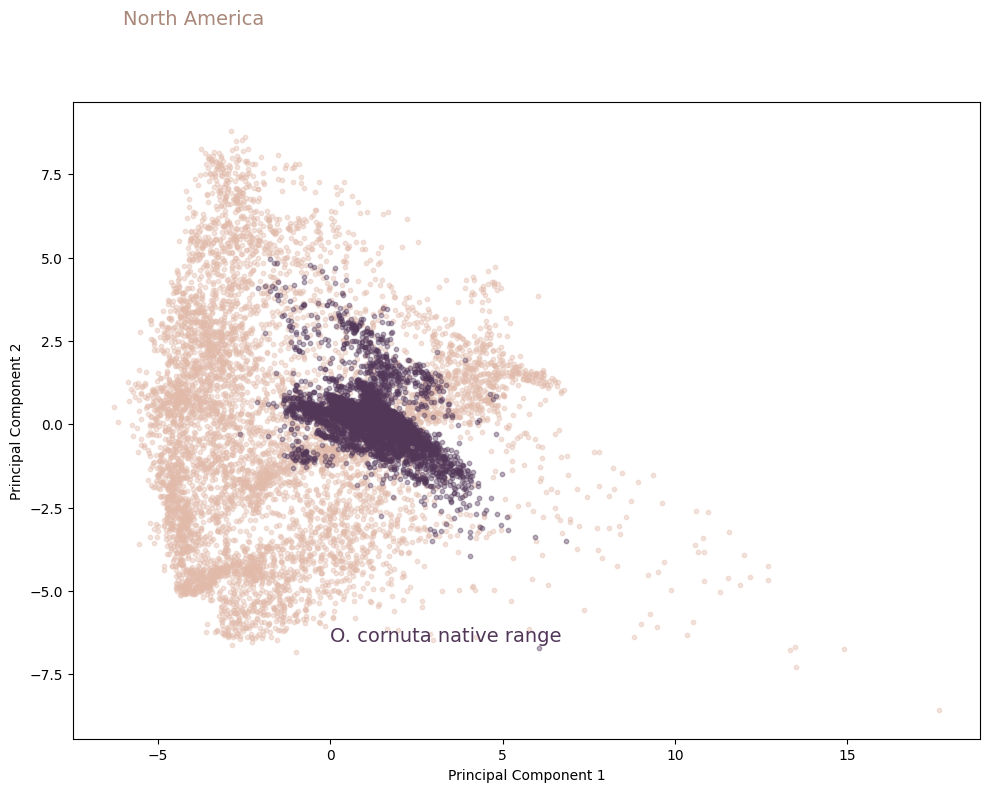

In [54]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = sorted(combined['group'].unique())  
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.4)

plt.text(-6, 12, 'North America', fontsize=14, color='#a9887a', fontname='Helvetica')
plt.text(0, -6.5, 'O. cornuta native range', fontsize=14, color='#523759', fontname='Helvetica')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
# plt.savefig('figures/pca_combined.png', format='png', dpi=300)